In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class GridWorld:
  def __init__(self, grid_width = 5, grid_height = 5):
    self.goodState1 = (0,1)
    self.goodState2 = (0,3)
    self.toState1 = (4,1)
    self.toState2 = (2,3)
    self.badState1 = (1,1)
    self.badState2 = (4,4)
    self.grid_width = grid_width
    self.grid_height = grid_height

  def next_move(self, action):
    if (action == "right"):
      return (0,1)
    elif (action == "left"):
      return (0,-1)
    elif (action == "down"):
      return (1,0)
    elif (action == "up"):
      return (-1,0)
	
  def step(self, state, action):
    next_state = tuple(map(lambda i, j: i + j, state, self.next_move(action)))
    reward = 0
    if (next_state[0] < 0 or next_state[1] < 0 or next_state[0] > 4 or next_state[1]> 4):
      reward = -1
      next_state = state
    if (state == self.goodState1):
      reward = 10
      next_state = (4,1)
    if (state == self.goodState2):
      reward = 5
      next_state = (2,3)
    if (state == self.badState1 or state == self.badState2):
       reward = -1

    return next_state, reward

  def Policy(self, state, action):
    return 0.25

In [3]:
env = GridWorld()

P = np.zeros((env.grid_width * env.grid_height, env.grid_width * env.grid_height))
R = np.zeros_like(P)
possible_actions = ["right", "left", "down", "up"]

for i in range(env.grid_height):
    for j in range(env.grid_width):
        state = (i, j)
        for action in possible_actions:
            next_state, reward = env.step(state, action)
            (i_next, j_next) = next_state
            P[i * env.grid_width + j, i_next * env.grid_width + j_next] += env.Policy(state, action)
            R[i * env.grid_width + j, i_next * env.grid_width + j_next] = reward

In [4]:
def Bellman_expectation(gamma, P_pi, R_pi):
  return np.dot(np.linalg.inv(np.identity(25)-gamma*P_pi), R_pi)

In [5]:
def vis_matrix(grid):
  fig, ax = plt.subplots()
  ax.matshow(grid, cmap='seismic')
  for (i, j), z in np.ndenumerate(grid):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
  plt.show()

In [6]:
R_e = np.sum(R*P, axis=1, keepdims=True)
bellman_eqn = Bellman_expectation(0.9, P, R_e)
grid_world = np.reshape(bellman_eqn, (5,5))

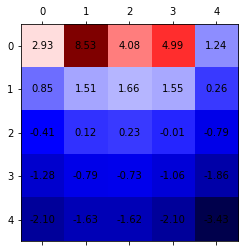

In [7]:
vis_matrix(grid_world)